In [55]:
from typing import NoReturn
import logging

import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt

import scipy as sp

In [56]:
def convm(x: ArrayLike, p: int) -> np.ndarray:
    """Construct the convolution matrix of the signal x with p number of parameters.

    (N + p - 1) by p non-symmetric Toeplitz matrix
    """
    _x = np.array(x, dtype=complex).ravel()
    if p < 1:
        raise ValueError(f"{p=} must be greater or equal to 1.")

    N = len(_x) + 2 * p - 2
    # the signal centered over its support
    # needed for the signal information-preserving frequency spectrum
    xcol = (_x.copy()).reshape(-1, 1)
    logging.warning(f'\n{xcol=}')
    xpad = np.concatenate((np.zeros((p - 1, 1)), xcol, np.zeros((p - 1, 1))))
    logging.warning(f'{xpad=}\n')
    X = np.empty([len(_x) + p - 1, p], dtype=complex)
    for i in range(p):
        X[:, i] = xpad[p - i - 1:N - i, 0]
    return X

In [57]:
def covar(x: ArrayLike, p: int) -> np.ndarray:
    """Covariance Matrix.

    p x p hermitian toeplitz matrix of sample covariances
    """
    _x = np.array(x, dtype=complex)
    m = len(_x)
    # remove the mean
    #_x = _x - np.mean(_x)
    conv = convm(x, p + 1)
    logging.warning(f'\n{conv.shape=}')
    logging.warning(f'\n{conv=}')
    R = conv.conjugate().transpose() @ conv.copy() / (m - 1)
    return R

In [58]:
def phd(x, p):
    R = covar(x, p)
    Rx = sp.linalg.toeplitz(x)
    d, v = np.linalg.eigh(Rx)
    index = np.argmin(d)
    vmin = v[:, index].copy()
    sigma = d[index]
    logging.warning(f'{v=}')
    logging.warning(f'{vmin=}')
    logging.warning(f'{sigma=}')
    rts = np.roots(vmin)
    vsig = np.delete(v, index, 1)
    phases = np.angle(rts)
    siggie = np.exp(1j * np.arange(p + 1).reshape(-1, 1) * phases)
    dtft = vsig.transpose() @ siggie.conjugate()
    dtft = np.abs(dtft)**2
    dsig = np.delete(d, index) - d[index]
    np.linalg.solve(dtft, dsig)

In [59]:
p = 2
x = np.array([6, 1.92705 + 4.58522j, -3.42705 + 3.49541j], dtype=complex)
_x = convm(x, 3)
print(_x)
Rx_conv = _x.transpose().conjugate() @ _x / 2
Rx = sp.linalg.toeplitz(x)
#Rx = Rx_conv
# Rx = Rx / np.abs(Rx)
d, v = np.linalg.eigh(Rx)
print(f'{d=}')
print(f'{Rx=}')
print(f'{v=}')

index = np.argmin(d)
vmin = v[:, index].copy()
sigma = d[index]
rts = np.roots(vmin)
vsig = np.delete(v, index, 1)
phases = np.angle(rts)
print(f'{v=}')
print(f'{vmin=}')
print(f'{sigma=}')
print(f'{rts=}')
print(f'{phases=}')

xcol=array([[ 6.     +0.j     ],
       [ 1.92705+4.58522j],
       [-3.42705+3.49541j]])
       [ 0.     +0.j     ],
       [ 6.     +0.j     ],
       [ 1.92705+4.58522j],
       [-3.42705+3.49541j],
       [ 0.     +0.j     ],
       [ 0.     +0.j     ]])



[[ 6.     +0.j       0.     +0.j       0.     +0.j     ]
 [ 1.92705+4.58522j  6.     +0.j       0.     +0.j     ]
 [-3.42705+3.49541j  1.92705+4.58522j  6.     +0.j     ]
 [ 0.     +0.j      -3.42705+3.49541j  1.92705+4.58522j]
 [ 0.     +0.j       0.     +0.j      -3.42705+3.49541j]]
d=array([ 1.00000161,  1.10485869, 15.8951397 ])
Rx=array([[ 6.     +0.j     ,  1.92705-4.58522j, -3.42705-3.49541j],
       [ 1.92705+4.58522j,  6.     +0.j     ,  1.92705-4.58522j],
       [-3.42705+3.49541j,  1.92705+4.58522j,  6.     +0.j     ]])
v=array([[ 0.40974303+0.j        , -0.7070716 +0.j        ,
        -0.57633359+0.j        ],
       [-0.33145704-0.74455189j, -0.0091694 +0.00392879j,
        -0.22439919-0.53415747j],
       [-0.2741981 +0.30447455j, -0.48772554+0.51193168j,
         0.40342281-0.41159499j]])
v=array([[ 0.40974303+0.j        , -0.7070716 +0.j        ,
        -0.57633359+0.j        ],
       [-0.33145704-0.74455189j, -0.0091694 +0.00392879j,
        -0.22439919-0.53415747j]

In [60]:
siggie = np.exp(1j * np.arange(p + 1).reshape(-1, 1) * phases)
dtft = vsig.transpose() @ siggie.conjugate()
d2 = np.fft.fft(vsig[:,-1], 1024)
dtft = np.abs(dtft)**2
dsig = np.delete(d, index) - d[index]
np.linalg.solve(dtft, dsig)

array([2.00098138, 2.99901701])

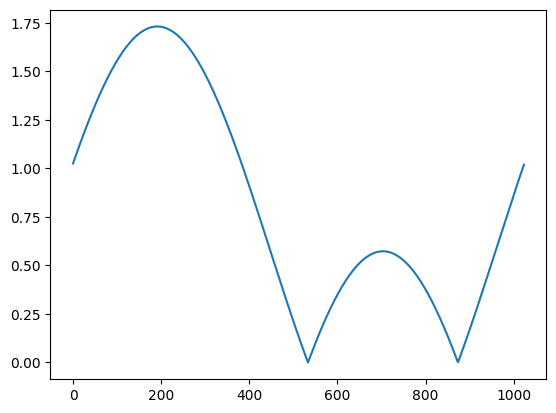

In [63]:
plt.plot(10 * np.log(np.abs(d2))**2)